<a href="https://colab.research.google.com/github/alokmangat/heart-disease-prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the data
heart_data=pd.read_csv("/content/heart.csv")

In [ ]:
# first five rows of data
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# number of rows and columns
heart_data.shape

(1025, 14)

In [ ]:
# info about the data
heart_data.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [ ]:
# statical about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking about the null values in dataset
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
print("since all data is in numericl form and there is no missing value.So we can now visualize the data")

since all data is in numericl form and there is no missing value.So we can now visualize the data


In [ ]:
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

# 1--> heart disease
# 0--> no heart disease

Visualizing the data

<Axes: xlabel='sex', ylabel='count'>

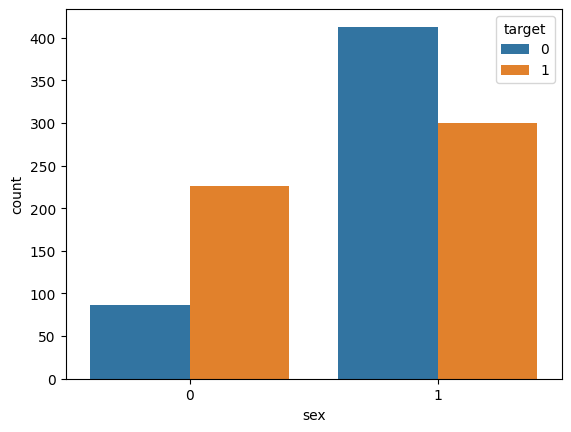

In [ ]:
sns.countplot(x="sex",hue="target",data=heart_data)

<Axes: xlabel='cp', ylabel='count'>

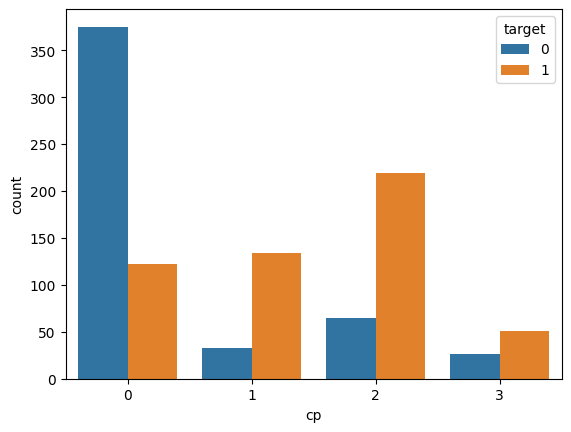

In [ ]:
sns.countplot(x="cp",hue="target",data=heart_data)

<Axes: xlabel='fbs', ylabel='count'>

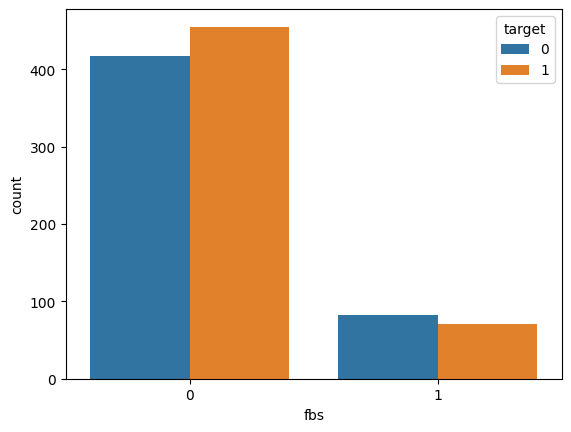

In [ ]:
sns.countplot(x="fbs",hue="target",data=heart_data)

<Axes: xlabel='restecg', ylabel='count'>

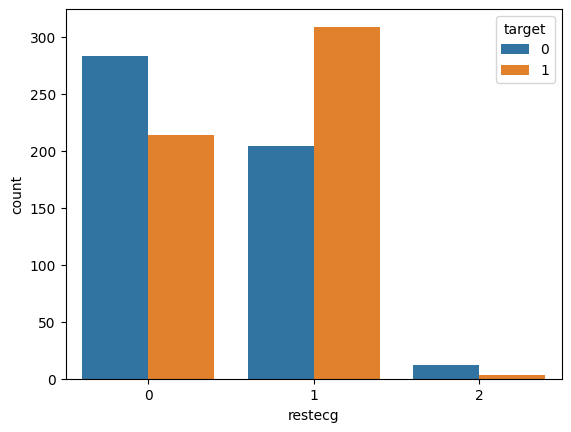

In [ ]:
sns.countplot(x="restecg",hue="target",data=heart_data)

sns.countplot(x="thalach",hue="target",data=heart_data)

<Axes: xlabel='exang', ylabel='count'>

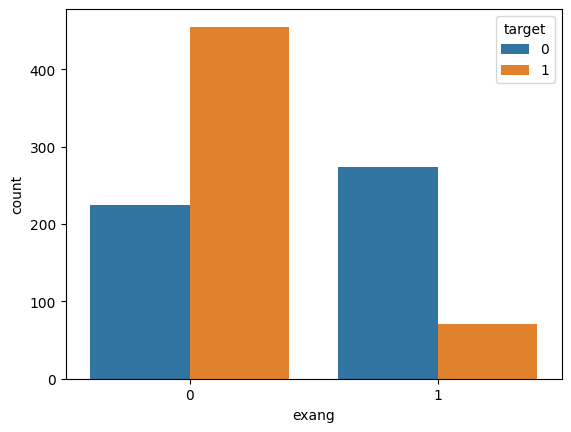

In [ ]:
sns.countplot(x="exang",hue="target",data=heart_data)

<Axes: xlabel='slope', ylabel='count'>

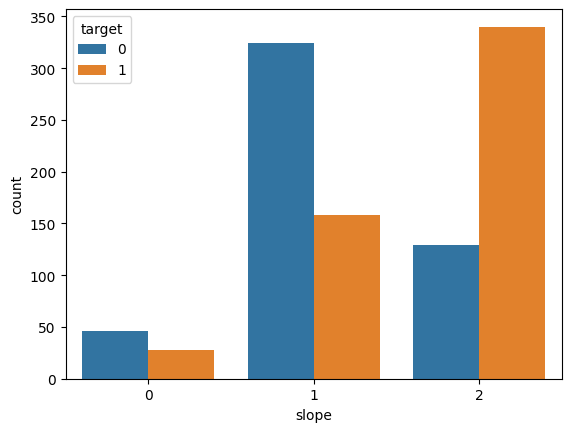

In [ ]:
sns.countplot(x="slope",hue="target",data=heart_data)

<Axes: xlabel='ca', ylabel='count'>

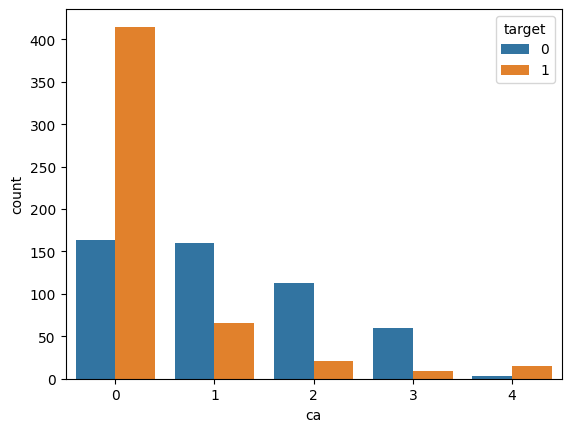

In [ ]:
sns.countplot(x="ca",hue="target",data=heart_data)

<Axes: xlabel='thal', ylabel='count'>

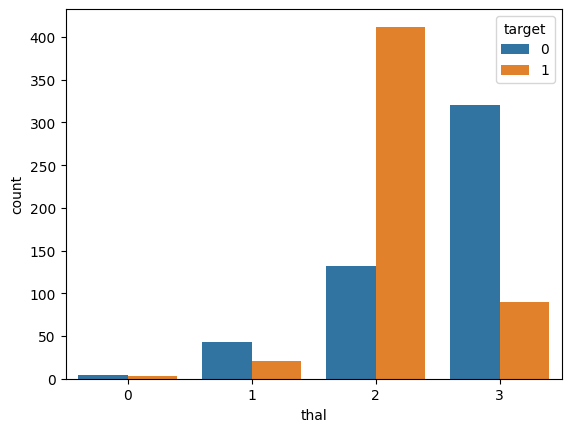

In [ ]:
sns.countplot(x="thal",hue="target",data=heart_data)

spliting the training and testing data

In [ ]:
data=heart_data.drop(["target"],axis=1)
labels=heart_data["target"]

In [ ]:
print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [ ]:
print(labels)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [ ]:
#training data and testing data
data_train,data_test,labels_train,labels_test=train_test_split(data,labels,test_size=0.1,stratify=labels,random_state=2)

In [ ]:
print(data.shape,data_train.shape,data_test.shape)

(1025, 13) (922, 13) (103, 13)


**model** **training**

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(data_train,labels_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

model evaluation

In [ ]:
data_train_prediction=model.predict(data_train)
training_accuracy_score=accuracy_score(data_train_prediction,labels_train)
print("Accuracy on trainig data :",training_accuracy_score)

Accuracy on trainig data : 0.8546637744034707


In [ ]:
data_test_prediction=model.predict(data_test)
testing_accuracy_score=accuracy_score(data_test_prediction,labels_test)
print("Accuracy on testing data :",testing_accuracy_score)

Accuracy on testing data : 0.8252427184466019


Building a predictive system

In [ ]:
data_input=(60,1,0,125,258,0,0,141,1,2.8,1,1,3)
data_input_as_numpy_array=np.asarray(data_input)
data_input_reshaped=data_input_as_numpy_array.reshape(1,-1)
prediction=model.predict(data_input_reshaped)
print(prediction)
if(prediction[0]==1):
  print("person has heart disease")
else:
  print("person does not have heart disease")

[0]
person does not have heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


finished....